# Evaluate the trained Triplet Model

In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
import pandas as pd
init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_sam1ples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2024-12-06 12:47:49.927687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-06 12:47:49.935470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733449669.943982  739358 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733449669.946556  739358 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 12:47:49.955601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  2
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


# Load Web Model

In [2]:
import tensorflow as tf
from scripts.triplet_functions import ResidualBlock  # Explicitly import the ResidualBlock class

# Create a dictionary of custom objects
custom_objects = {
    'ResidualBlock': ResidualBlock
}

# Load the model with custom objects
web_model = tf.keras.models.load_model(
    "../models-LOC2-LOC3/website/LOC2-LOC3-baseCNN-epochs20-train_samples1200-triplet_samples5-domain_invariant-l0.1.keras",
    custom_objects=custom_objects
)

I0000 00:00:1733449676.814428  739358 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1733449676.814535  739358 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22281 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1733449676.814679  739358 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 1
I0000 00:00:1733449676.814736  739358 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22289 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:71:00.0, compute capability: 8.9


# Dimensionality Reduction Visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

random.seed(init_dataset.random_seed)
test_df.sort_values(by=['Location','Website'], inplace=True)
pca_web_samples = random.sample(test_web_samples, 5)
pca_df = test_df[test_df['Website'].isin(pca_web_samples)]
reducers = {'t-SNE': TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3), 'PCA': PCA(n_components=2), 'UMAP': umap.UMAP()}


def plt_scatter_location(embedding, pca_df, pca_web_samples, location:str, mark:str):
    mask = pca_df['Location'] == location
    plt.scatter(
        embedding[mask, 0],
        embedding[mask, 1],
        c=[sns.color_palette("deep", n_colors=len(pca_web_samples))[x] for x in pca_df[mask].Website.map({pca_web_samples[i]:i for i in range(len(pca_web_samples))})],
        alpha=0.4,
        marker = mark,
        label = location
        
    )

/tmp/ipykernel_739358/962414931.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values(by=['Location','Website'], inplace=True)


/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


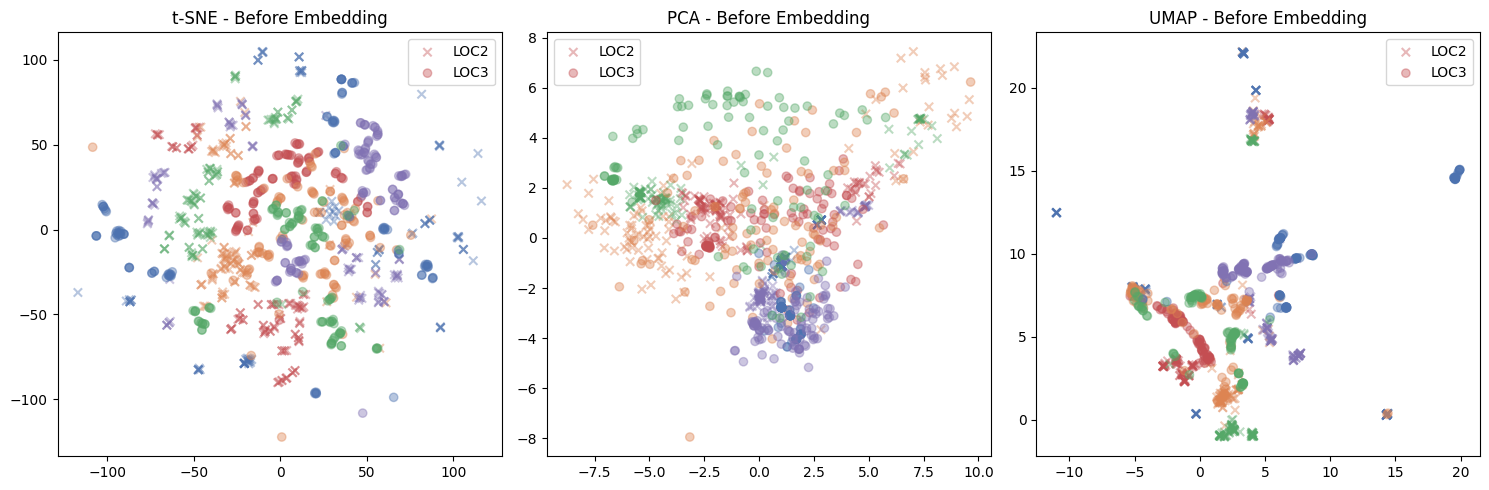

In [4]:
# Before Embedding

plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(pca_df.iloc[:, 2:])
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[0], 'x')
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[1], 'o')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - Before Embedding")
plt.show()


I0000 00:00:1733449686.360172  739512 cuda_dnn.cc:529] Loaded cuDNN version 90300


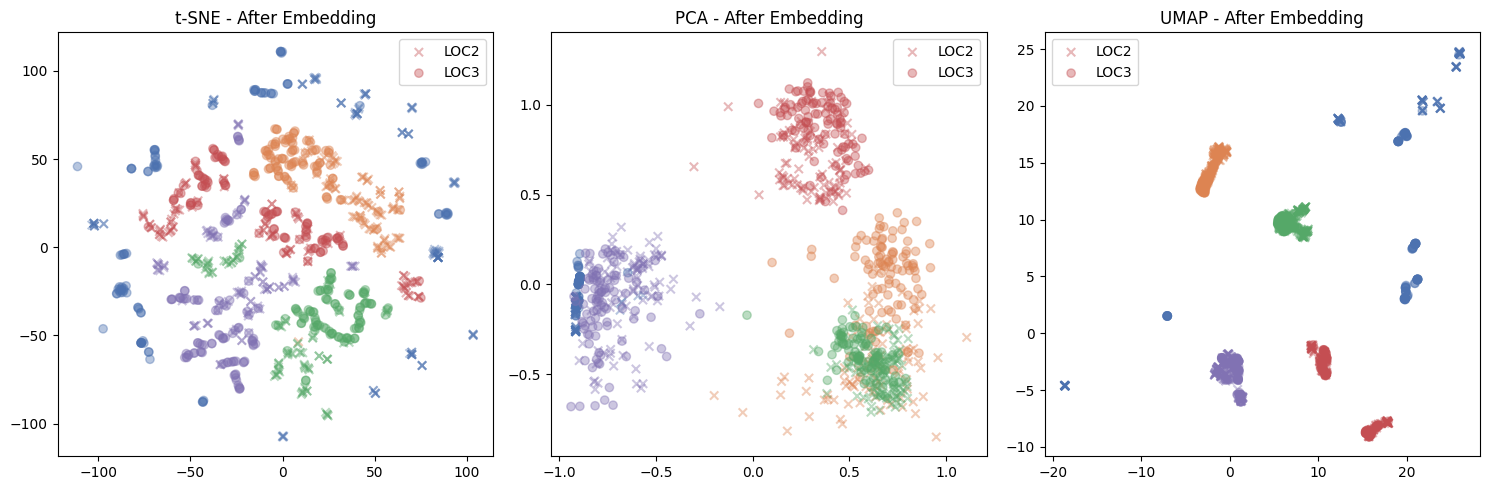

In [5]:
# After Embedding

plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(web_model(pca_df.iloc[:, 2:]))
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[0], 'x')
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[1], 'o')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - After Embedding")
plt.show()

### Inside a selected cluster from the train set

In [ ]:
selected_website = 8
selected_df = train_df[train_df['Website'] == selected_website]

plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(web_model(selected_df.iloc[:, 2:]))
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding, selected_df, [selected_website], locations[0], 'x')
    plt_scatter_location(embedding, selected_df, [selected_website], locations[1], 'o')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - After Embedding")
plt.show()

# Website Classification: Train on One Location, Test on the other

## KNN Classification

In [6]:
import scripts.classification as classification
X_train, y_train, X_test, y_test, le = classification.preprocess_data_for_web_classification(test_df, locations[0], locations[1])

### No Embedding

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 5.06, F1 Score:  5.23, Precision:  10.21, Recall:  5.06


(0.050572390572390574,
 0.10206863362427697,
 0.050572390572390574,
 0.05232205713122456,
 array([[17,  0,  0, ...,  0,  0,  0],
        [ 0, 10,  0, ...,  2,  0,  1],
        [ 0,  0,  2, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  1,  0, ...,  0, 13,  0],
        [ 0,  0,  0, ...,  0,  0,  1]]))

### With Triplet Embedding

In [8]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
classification.evaluate_classification_model(web_model(X_train), y_train, web_model(X_test), y_test, model)

Accuracy: 53.49, F1 Score:  51.19, Precision:  54.11, Recall:  53.49


(0.534949494949495,
 0.5410742700464235,
 0.534949494949495,
 0.511915130952595,
 array([[80,  0,  0, ...,  0,  0,  0],
        [ 3, 61,  0, ...,  0,  0,  0],
        [ 0,  3, 58, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 51,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0, 90]]))

In [6]:
# Optional: Save model 
import joblib

joblib.dump(model, "../models/classification/website/KNN-TripletEpochs100-Samples5-DomainInvariant.pkl")

['../models/classification/website/KNN-TripletEpochs100-Samples5-DomainInvariant.pkl']

## Random Forest Classification

### No Embedding

In [11]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 20.40, F1 Score:  18.50, Precision:  22.57, Recall:  20.40


(0.20397306397306397,
 0.22574827067682587,
 0.20397306397306397,
 0.18497627170690428,
 array([[75,  0,  0, ...,  0,  0,  0],
        [10, 46,  0, ...,  0,  0,  0],
        [ 2,  1, 34, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  3,  0, ...,  0, 46,  0],
        [ 0,  0,  0, ...,  0,  0, 93]]))

### With Embedding

In [12]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
classification.evaluate_classification_model(web_model(X_train), y_train, web_model(X_test), y_test, model)

Accuracy: 59.45, F1 Score:  56.71, Precision:  62.95, Recall:  59.45


(0.5945117845117845,
 0.6294685917852751,
 0.5945117845117845,
 0.567101697895503,
 array([[85,  0,  0, ...,  0,  0,  0],
        [ 0, 87,  0, ...,  0,  0,  0],
        [ 0,  0, 97, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 67,  0,  0],
        [ 0,  0,  0, ...,  0, 76,  0],
        [ 0,  0,  0, ...,  0,  0, 97]]))

### XGBoost Classifier

In [9]:
from xgboost import XGBClassifier


model = XGBClassifier()
classification.evaluate_classification_model(X_train, y_train, X_test, y_test, model)

Accuracy: 20.16, F1 Score:  17.45, Precision:  17.79, Recall:  20.16


(0.20164,
 0.17792971996702198,
 0.20163999999999999,
 0.1745490281783683,
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0, 53,  2, ...,  0,  0,  0],
        [ 0,  0, 86, ...,  0,  1,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0, 91,  0],
        [ 0,  0,  0, ...,  0,  0, 86]]))

In [10]:
from xgboost import XGBClassifier


model = XGBClassifier()
classification.evaluate_classification_model(web_model(X_train), y_train, web_model(X_test), y_test, model)

Accuracy: 57.78, F1 Score:  58.48, Precision:  62.63, Recall:  57.78


(0.57785,
 0.6262694367934828,
 0.57785,
 0.584820271773792,
 array([[129,   0,   0, ...,   0,   0,   0],
        [  0,  99,   4, ...,   0,   0,   0],
        [  0,   7, 136, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  66,   0,   0],
        [  0,   0,   0, ...,   0, 162,   0],
        [  0,   0,   0, ...,   0,   0, 148]]))